In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [3]:
car=pd.read_csv('Cleaned_Car_data.csv')
car

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...,...
811,811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [4]:
car.shape

(816, 7)

In [5]:
car.describe(include='all')

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
count,816.000000,816,816,816.000000,8.160000e+02,816.000000,816
unique,NaN,254,25,NaN,NaN,NaN,3
top,NaN,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,NaN,51,221,NaN,NaN,NaN,428
mean,407.500000,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,235.703203,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,0.000000,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,203.750000,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,407.500000,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,611.250000,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [6]:
car=car[car['Price']<6000000]

In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 0 to 815
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  815 non-null    int64 
 1   name        815 non-null    object
 2   company     815 non-null    object
 3   year        815 non-null    int64 
 4   Price       815 non-null    int64 
 5   kms_driven  815 non-null    int64 
 6   fuel_type   815 non-null    object
dtypes: int64(4), object(3)
memory usage: 50.9+ KB


In [8]:
car.corr()

,Unnamed: 0,year,Price,kms_driven
Unnamed: 0,1.000000,-0.134437,-0.019854,0.124321
year,-0.134437,1.000000,0.347764,-0.233699
Price,-0.019854,0.347764,1.000000,-0.149621
kms_driven,0.124321,-0.233699,-0.149621,1.000000


<AxesSubplot:>

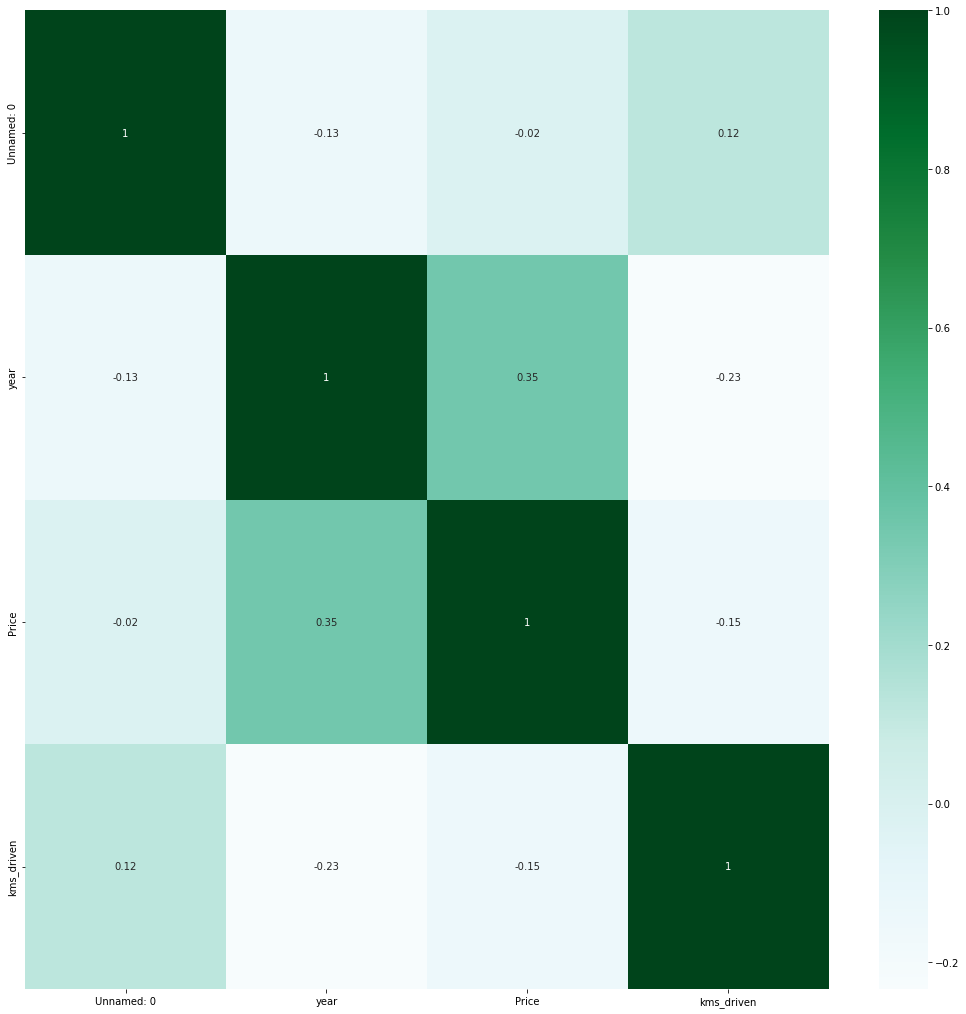

In [10]:
import seaborn as sns 
plt.figure(figsize=(18,18))
sns.heatmap(car.corr(), cmap= "BuGn", annot=True)

In [11]:
X=car[['year','kms_driven']]
y=car['Price']

In [12]:
X

,year,kms_driven
0,2007,45000
1,2006,40
2,2014,28000
3,2014,36000
4,2012,41000
...,...,...
811,2011,50000
812,2009,30000
813,2009,132000
814,2018,27000


In [13]:
y.shape

(815,)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

DecisionTreeRegressor

In [15]:
from sklearn.tree import DecisionTreeRegressor
dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)
dec_model.score(X_test, y_test)

0.16574903107637773

RandomForestRegressor

In [17]:
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)
random_model.score(X_test, y_test)

0.45001725639538204

XGBoost Regression

In [18]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.3459049961199496